<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [389]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [390]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [391]:
# Answer:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Check the data type of each column.

In [392]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [393]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [394]:
# Answer:
#sort by duration, then reference the first and last records using iloc
print(movies.sort_values('duration').iloc[0])
print(movies.sort_values('duration').iloc[-1])


#Alternatively:
#print(movies.sort_values('duration').head(1))
#print(movies.sort_values('duration').tail(1))

star_rating                                                       8
title                                                        Freaks
content_rating                                              UNRATED
genre                                                         Drama
duration                                                         64
actors_list       [u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...
Name: 389, dtype: object
star_rating                                                     7.8
title                                                        Hamlet
content_rating                                                PG-13
genre                                                         Drama
duration                                                        242
actors_list       [u'Kenneth Branagh', u'Julie Christie', u'Dere...
Name: 476, dtype: object


#### Create a histogram of duration, choosing an "appropriate" number of bins.

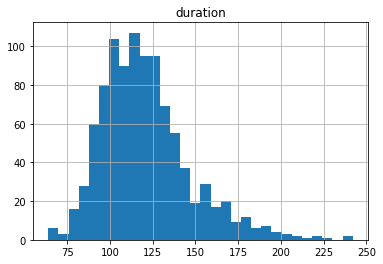

In [395]:
# Answer:
movies.hist('duration', bins=30);
#durations span from 64 to 242 minutes and about 1000 records exist 
#30 bins seem appropriate

#### Use a box plot to display that same data.

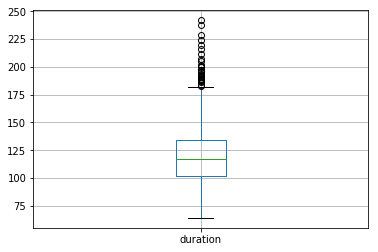

In [396]:
# Answer:
movies.boxplot('duration');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [397]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

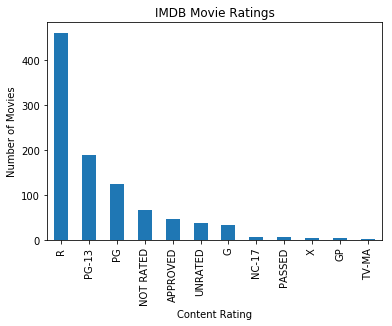

In [398]:
# Answer:
movies.loc[:,'content_rating'].value_counts().plot(kind='bar');
plt.xlabel('Content Rating');
plt.ylabel('Number of Movies');
plt.title('IMDB Movie Ratings');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [399]:
# Answer:
# create a variable that only contains movies in the list to be changed
unrated_movies = movies.loc[:,'content_rating'].isin(['NOT RATED','APPROVED','PASSED','GP'])

#ensure the movies appearing in that variable are only those ratings listed
movies.loc[unrated_movies,:]

#use that variable to call the appropriate rows and change their rating
movies.loc[unrated_movies,'content_rating'] = "UNRATED"

movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [400]:
# Answer:
#same process as above

# create a variable that only contains movies in the list to be changed
nc17_movies = movies.loc[:,'content_rating'].isin(['X','TV-MA'])

#ensure the movies appearing in that variable are only those ratings listed
movies.loc[nc17_movies,:]

#use that variable to call the appropriate rows and change their rating
movies.loc[nc17_movies,'content_rating'] = "NC-17"

movies

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",UNRATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Count the number of missing values in each column.

In [401]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [402]:
# Answer:

#create a variable for anything with a null content rating -using isnull()
null_rating = movies.loc[:,'content_rating'].isnull()

#ensure the movies appearing in that variable are only those with null ratings
movies.loc[null_rating,:]

#use that variable to call the appropriate rows and add a rating
movies.loc[null_rating,'content_rating'] = 'PG'

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,PG,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,PG,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,PG,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [403]:
# Answer:
longer_than_two = movies.loc[:,'duration'] > 120
shorter_than_two = movies.loc[:,'duration'] < 120
print(movies.loc[longer_than_two,'star_rating'].mean())
print(movies.loc[shorter_than_two,'star_rating'].mean())

# the average star rating is relatively similar between movies longer than 2 hours and shorter than 2 hours

7.953669724770622
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

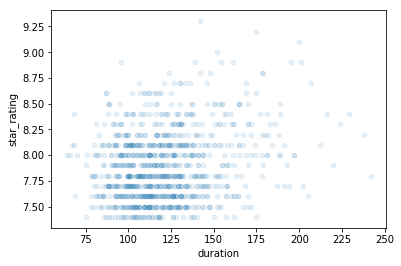

In [158]:
#creating a scatterplot between duration and star rating and making a low alpha to see density
movies.plot(kind='scatter', x='duration',y='star_rating', alpha = 0.1)

#there does not appear to be a relationship between duration and star rating

#### Calculate the average duration for each genre.

In [159]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


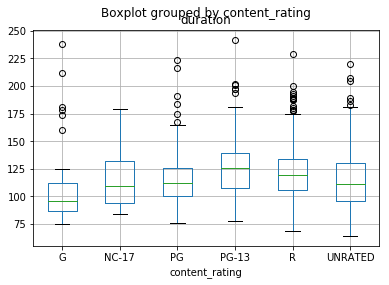

In [171]:
# Answer:
movies.boxplot(column='duration', by='content_rating')

#boxplot shows the categorical content ratings with a good picture of the mean 
##and distribution of duration within each rating and compared to each other

#### Determine the top rated movie (by star rating) for each genre.

In [409]:
# Answer:
movies.loc[(movies.groupby('genre')['star_rating'].idxmax()),:]

#idxmax pulls the entire row with the maximum star rating, within each genre 

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G..."
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
5,8.9,12 Angry Men,UNRATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
468,7.9,E.T. the Extra-Terrestrial,PG,Family,115,"[u'Henry Thomas', u'Drew Barrymore', u'Peter C..."
638,7.7,The City of Lost Children,R,Fantasy,112,"[u'Ron Perlman', u'Daniel Emilfork', u'Judith ..."
105,8.3,The Third Man,UNRATED,Film-Noir,93,"[u'Orson Welles', u'Joseph Cotten', u'Alida Va..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [410]:
# Answer:
movies.duplicated().sum()
# returns zero duplicates

0

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [411]:
# Answer:
#first pull a list of the count within every genre
movies.groupby('genre').count().sort_values('star_rating')

# list out all the genres with at least 10 instances
use_genres = ['Mystery','Horror','Animation','Adventure','Biography','Crime','Action','Comedy','Drama']

# create a Boolean field referencing that list to use in calculation
filtered_movies = movies.loc[:,'genre'].isin(use_genres)

# find the mean rating from the filtered movies list grouped by genre
movies.loc[filtered_movies,:].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [449]:
# Answer:

##this code DOES NOT work
values_over_ten = movies.loc[:,'genre'].value_counts().apply(lambda value_counts: value_counts > 9)
values_over_ten
movies.loc[values_over_ten,:].groupby('genre')['star_rating'].mean()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [445]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!